**Aufgabe 47:**

Lösen Sie das Hamilton System aus Example 6.4 des Vorlesungskriptes numerisch mit dem RK4 Verfahren aus Example 2.25, der impliziten Mittelpunktsregel aus Example 3.5 und einem symplektischen Eulerverfahren aus Example 6.29. Beobachten Sie die Hamilton-Funktion der numerischen Lösung für lange Zeiträume. Erklären Sie die Ergebnisse.

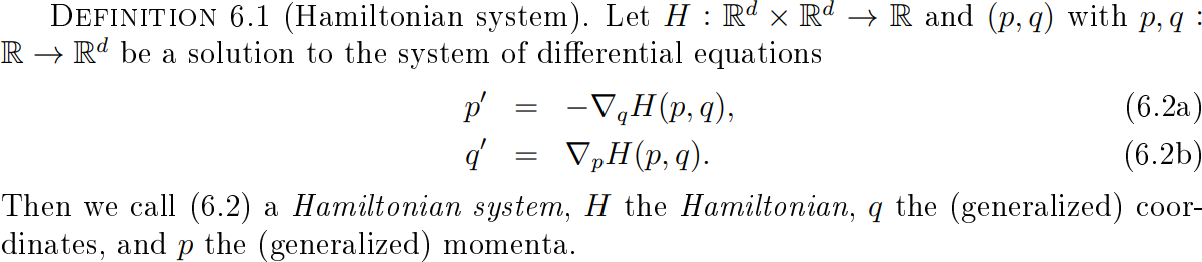

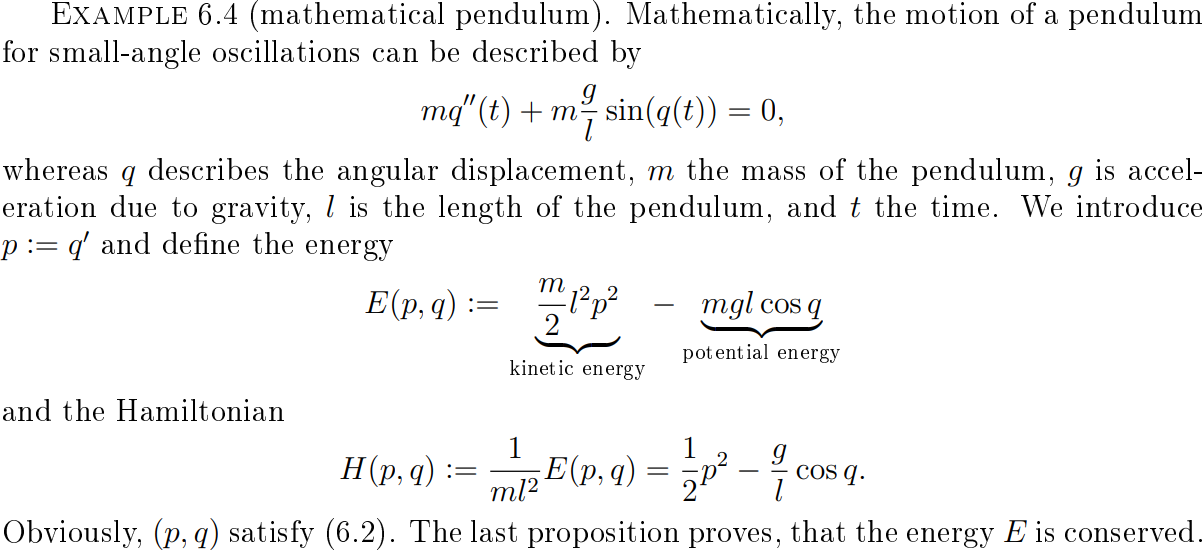

**Auxillary comments:**

Die ursprüngliche Pendelgleichung

\begin{align*}
    m q^{\prime \prime}(t) + m \frac{g}{l} \sin{(q(t))} = 0,
\end{align*}

lässt sich, vermöge der Substitution $p = q^\prime$, in ein ODE-System 1ter Ordnung umschreiben.
Der Witz ist, dass dann genau ein hammiltonsches System, wie in (6.2) rauskommt.

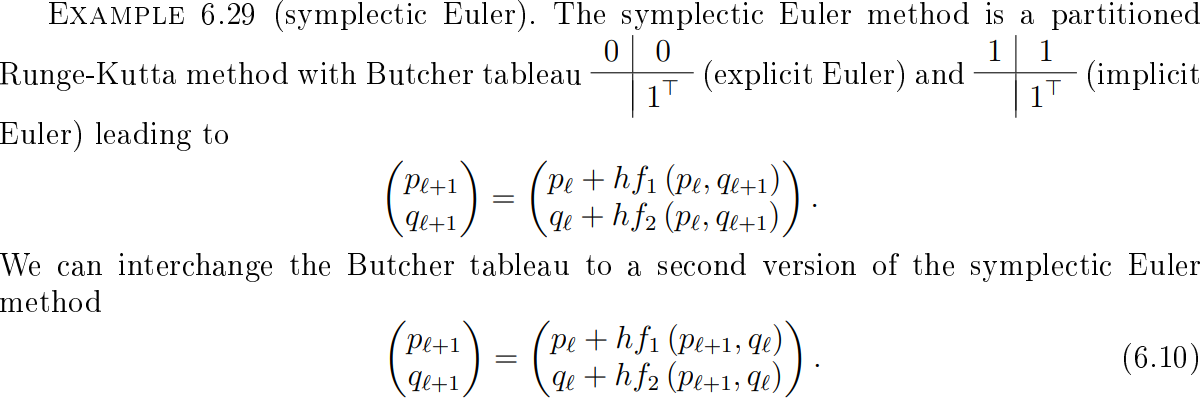

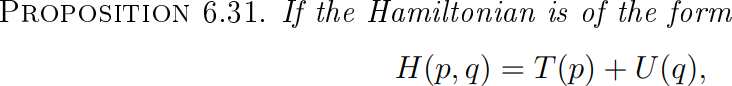

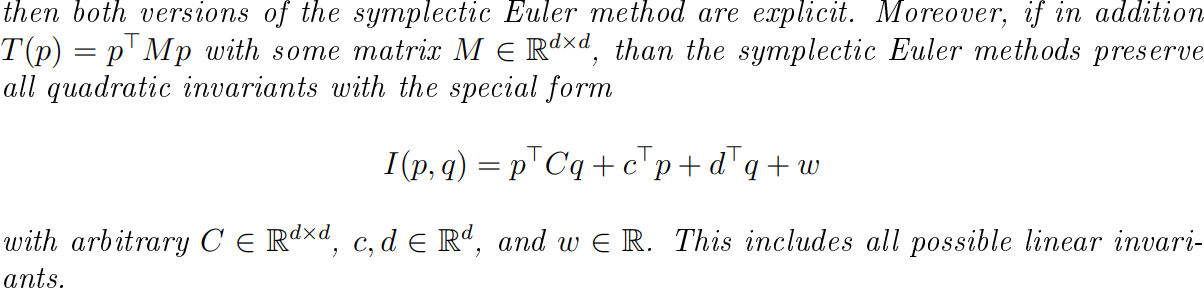

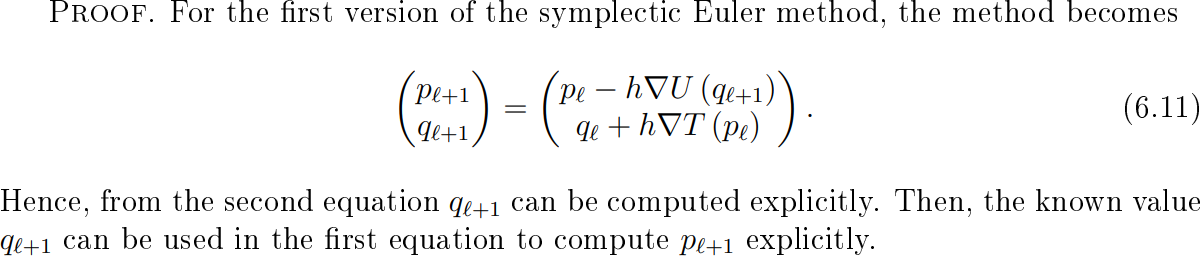

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def RK(a,b,c,t,y0,f):
    y=[y0]
    for j in range(1,len(t)):
        k=[f(t[j-1],y[-1])]
        h=t[j]-t[j-1]
        y.append(y[-1]+h*k[0]*b[0])
        for i in range(len(c)):
            k.append(f(t[j-1]+c[i]*h,y[-2]+h*sum([ai*ki for ai,ki in zip(a[i],k)])))
            y[-1]+=h*b[i+1]*k[-1]
    return np.array(y)

def RK4(t,y,f):
    a=[[1/2],[0,1/2],[0,0,1]]
    b=[1/6,1/3,1/3,1/6]
    c=[1/2,1/2,1]
    return RK(a,b,c,t,y,f)

def implicit_midpoint(t,y_0,f,df,tol,max_iter):
    y = np.zeros((len(t),2))
    y[0] = y_0
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        z = [y[i] + h*f(t[i],y[i])]
        #F_i(y) = y - y[i] - h[i]f((t[i]+t[i+1])/2,(y[i] + y)/2)
        z.append(np.linalg.solve(np.identity(2)-h/2*df((t[i]+t[i+1])/2,(y[i] + z[-1])/2),-(z[-1]-y[i]-h*f((t[i]+t[i+1])/2,(y[i] + z[-1])/2))) + z[-1])
        while True:
            j = 1
            z.append(np.linalg.solve(np.identity(2)-h/2*df((t[i]+t[i+1])/2,(y[i] + z[-1])/2),-(z[-1]-y[i]-h*f((t[i]+t[i+1])/2,(y[i] + z[-1])/2))) + z[-1])
            q = np.linalg.norm(z[-1] - z[-2])/np.linalg.norm(z[-2] - z[-3])
            j += 1
            if q >= 1:
                print("PROBLEM!")
            if q/(1-q)*np.linalg.norm(np.linalg.norm(z[-1] - z[-2])) <= tol or j >= max_iter:
                break
        y[i+1] = z[-1]
    return np.array(y)

# ---------------------------------------------------------------- #

def symplectic_euler(t, p0, q0, hp, hq, tol, max_iter):

    p = [p0]
    q = [q0]
 
    for i in range(len(t)- 1):

        h = t[i+1] - t[i]

        p_new = p[i] - h * hq(p[i],  q[i])
        q_new = q[i] + h * hp(p_new, q[i])

        p.append(p_new)
        q.append(q_new)

    return np.array(p), np.array(q)

In [3]:
def test(l):

    # observation time interval
    t_init = 0
    t_fin  = 10
    dt     = 1e-3
    T      = np.arange(t_init, t_fin, dt)

    # gravitational constant
    g = 9.81

    # right hand side & its derivative (reformulated as 1st order ODE-system)
    f  = lambda t, y: np.array([-g / l * np.sin(y[1]), y[0]])
    fy = lambda t, y: np.array([[0, -g / l * np.cos(y[1])], [1, 0]])
    # f  = lambda t, y: np.array([y[1],    -g / l * np.sin(y[0])])
    # fy = lambda t, y: np.array([[0, 1], [-g / l * np.cos(y[0]), 0]])

    # hamiltonian & its derivatives
    h  = lambda p, q: p**2 / 2 - g / l * np.cos(q)
    hp = lambda p, q: p
    hq = lambda p, q: g / l * np.sin(q)

    # initial value
    y0 = np.array([2, 1])

    # -------------------------------- #

    y1 = RK4(T, y0, f)
    h1 = h(y1[:, 0], y1[:, 1])

    tol = 1e-6
    max_iter = 10
    y2 = implicit_midpoint(T, y0, f, fy, tol, max_iter)
    h2 = h(y2[:, 0], y2[:, 1])

    y3p, y3q = symplectic_euler(T, y0[0], y0[1], hp, hq, tol, max_iter)
    h3 = h(y3p, y3q)

    # -------------------------------- #

    fig, axs = plt.subplots(3, 1, figsize = (15, 15))

    axs[0].plot(T, h1)
    axs[0].title.set_text("RK4")

    axs[1].plot(T, h2)
    axs[1].title.set_text("Implicit Midpoint")

    axs[2].plot(T, h3)
    axs[2].title.set_text("Symplectic Euler")

    for ax in axs:

        ax.grid(True)
        ax.set_xlabel('$t$')
        ax.set_ylabel('$H(p(t), q(t))$')

    fig.tight_layout()
    plt.show()

    # -------------------------------- #
    
    return max(h1) - min(h1), max(h2) - min(h2), max(h3) - min(h3)

# ---------------------------------------------------------------- # 

l = 1


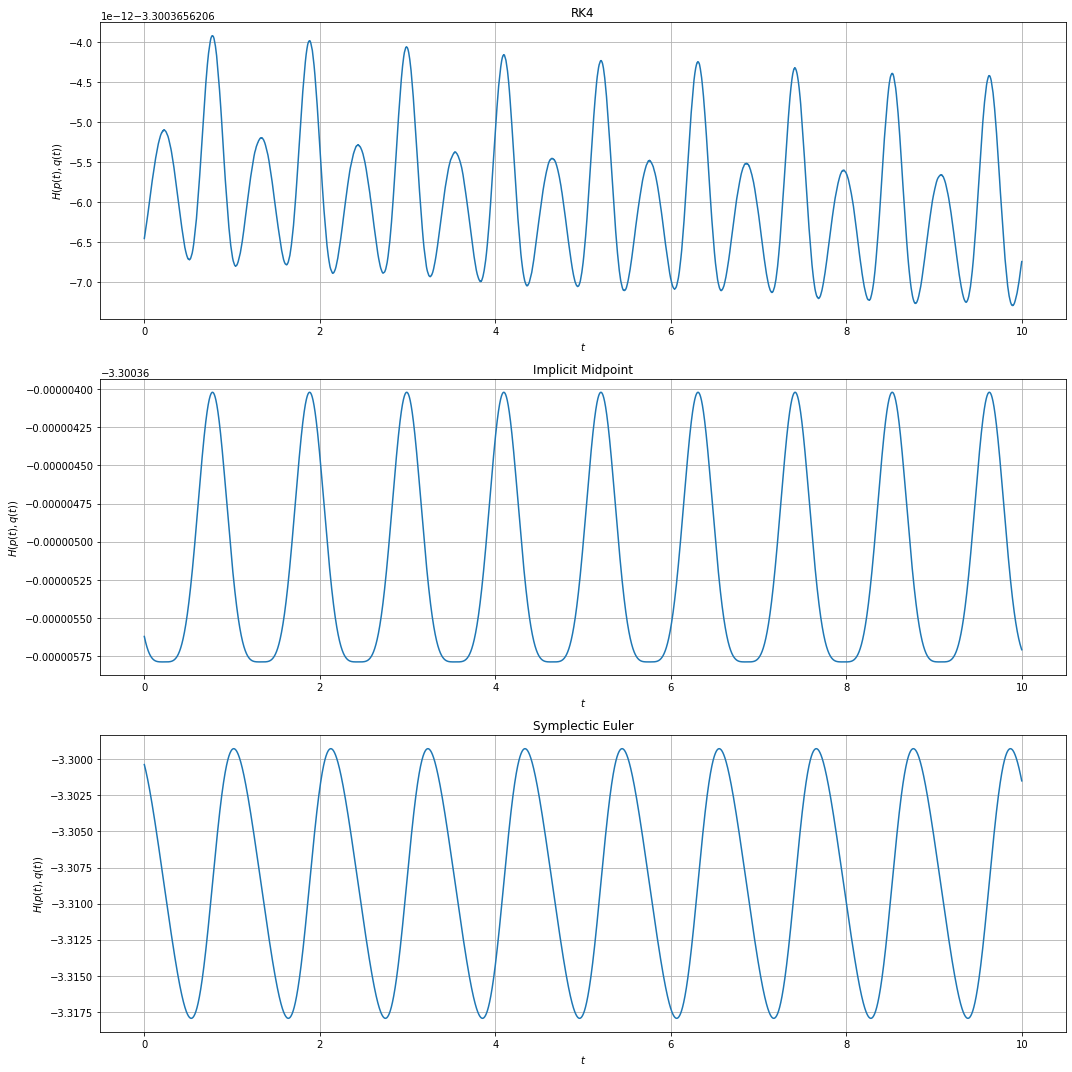

# ---------------------------------------------------------------- # 

l = 2


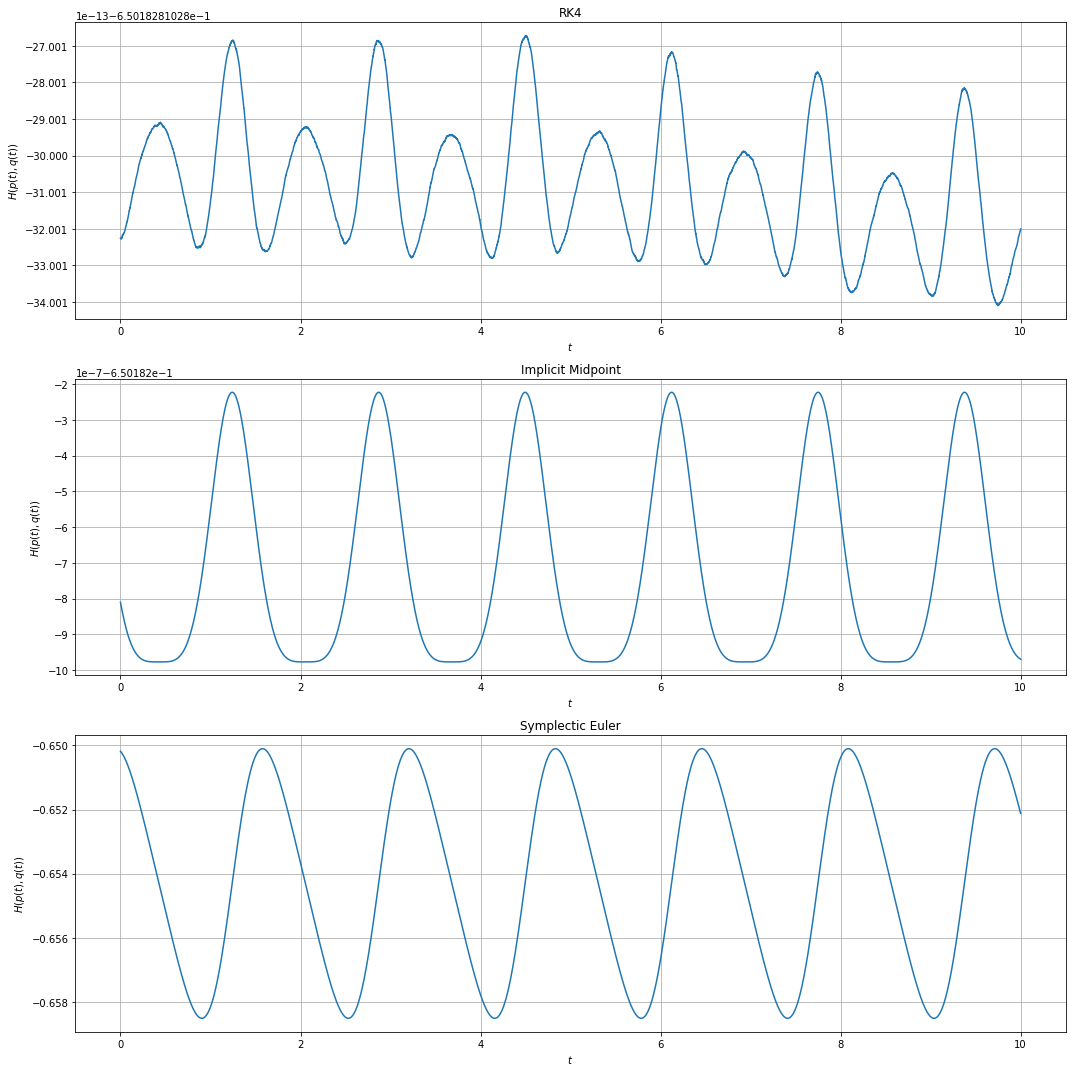

# ---------------------------------------------------------------- # 

l = 5


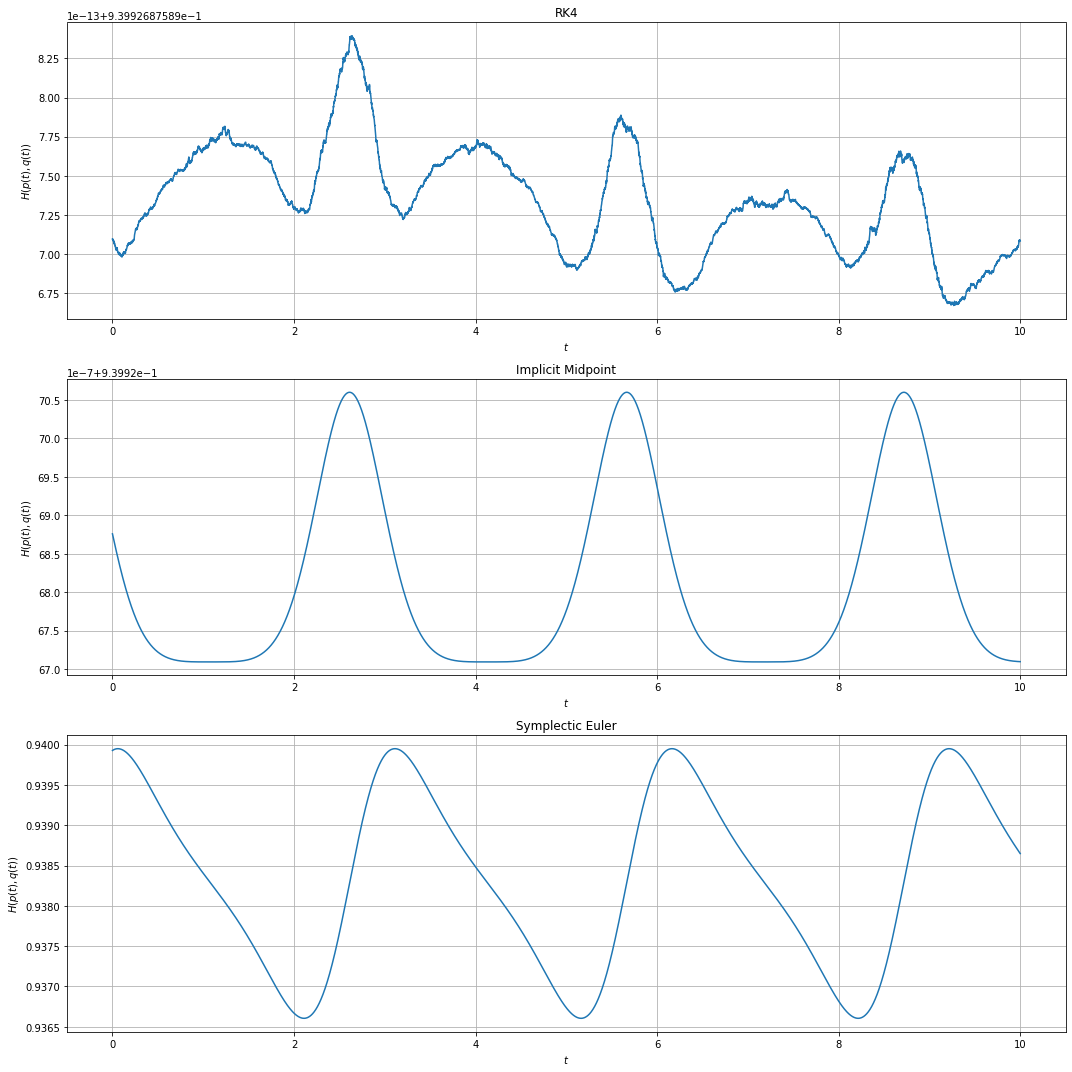

# ---------------------------------------------------------------- # 

l = 10


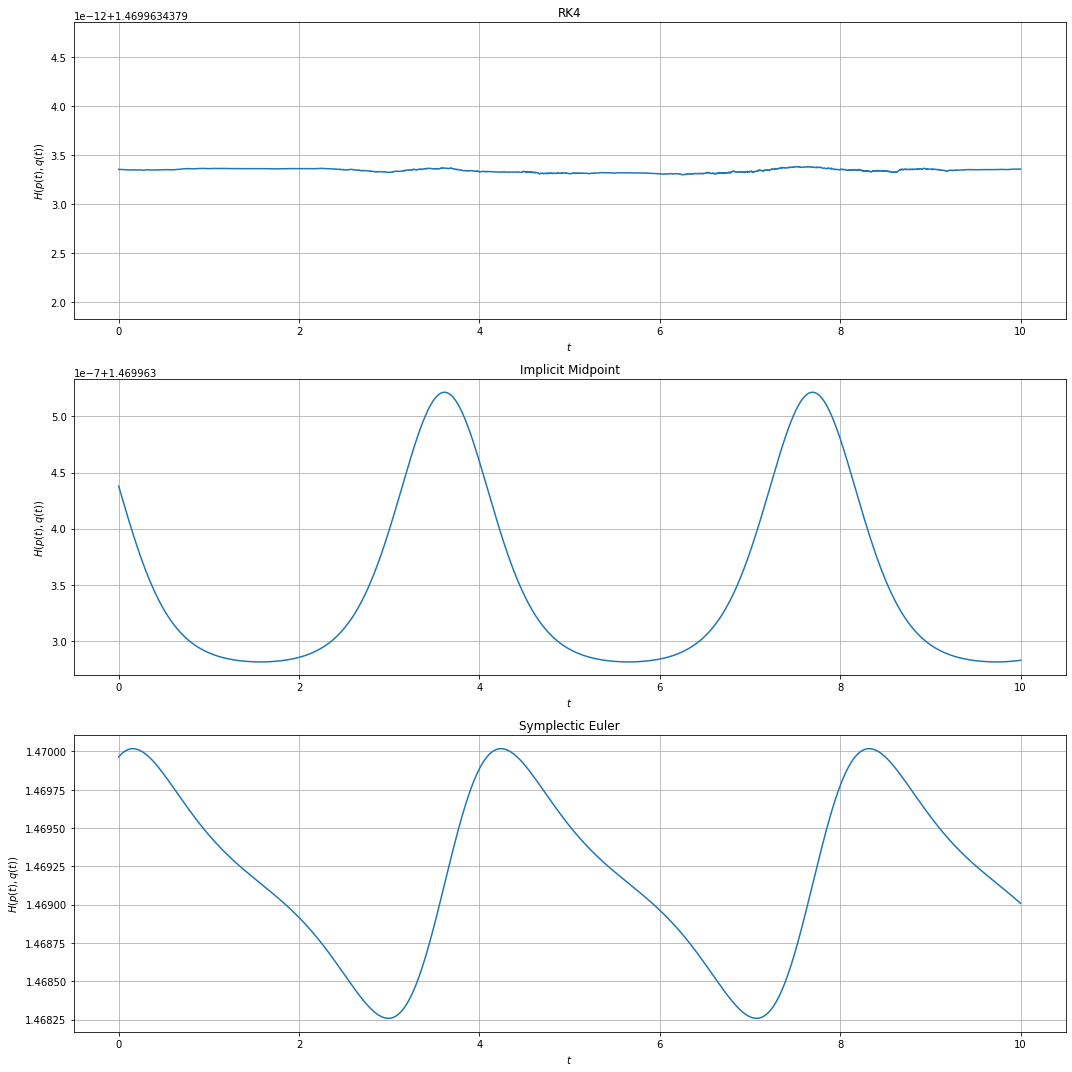

# ---------------------------------------------------------------- # 

l = 20


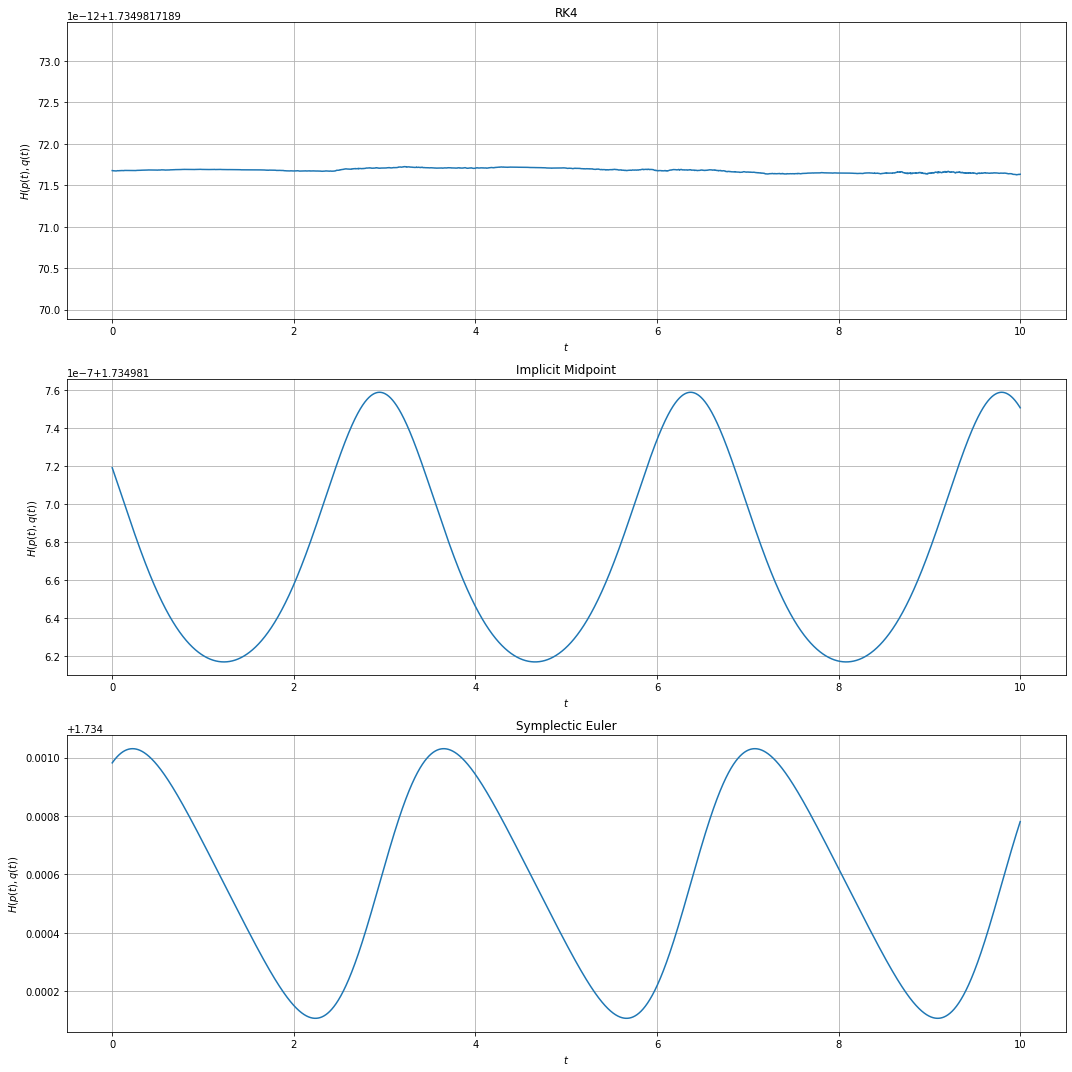

# ---------------------------------------------------------------- # 

l = 25


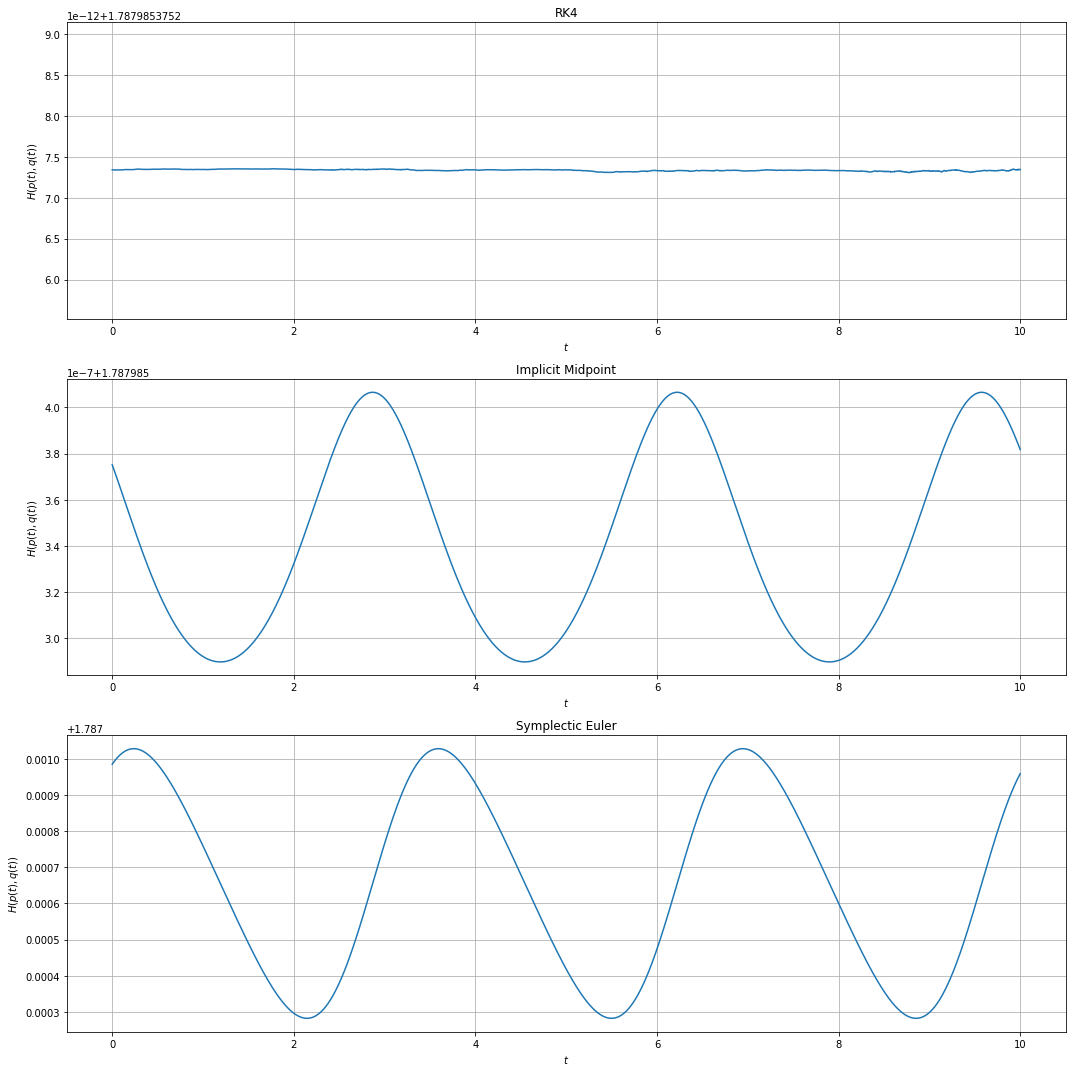

# ---------------------------------------------------------------- # 

l = 50


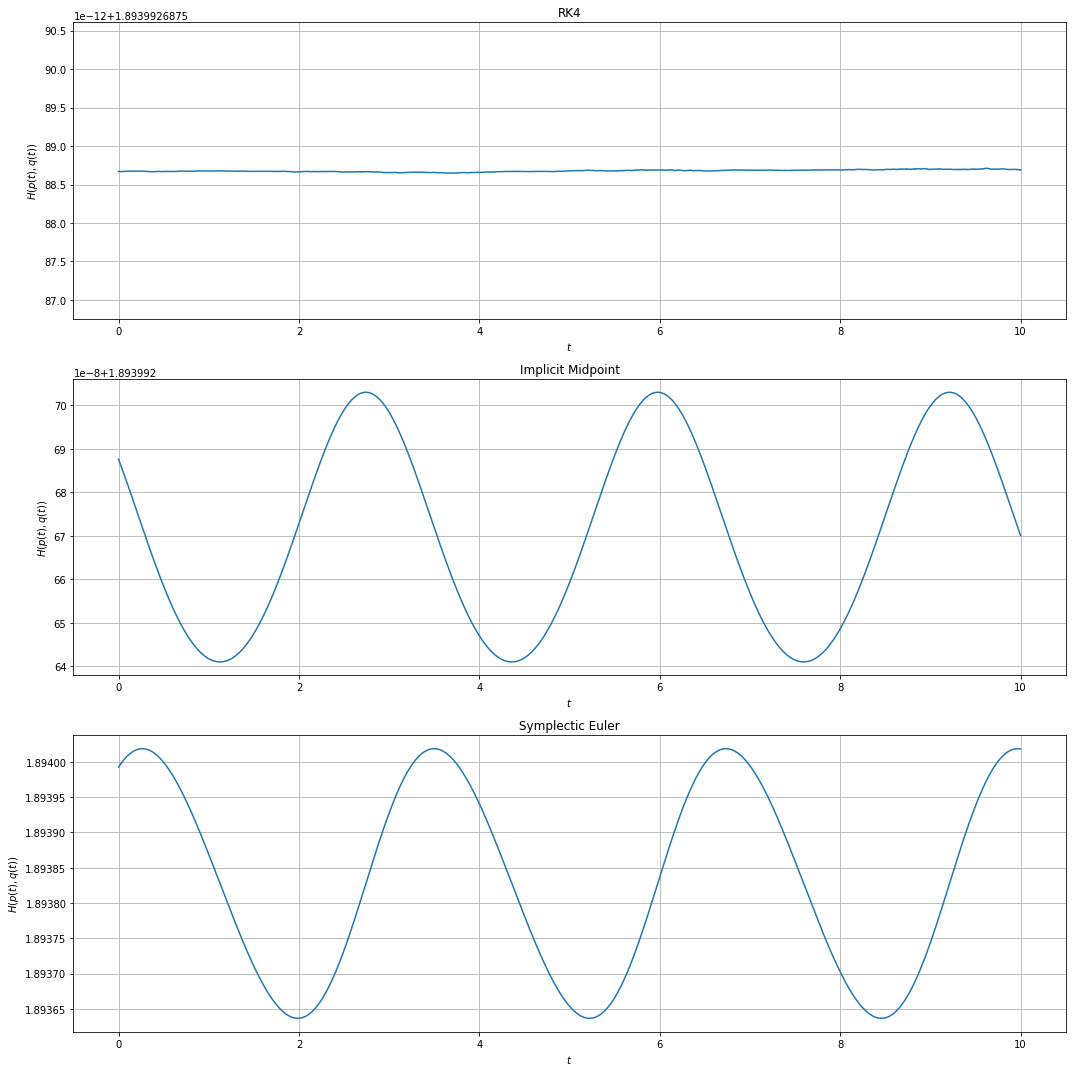

# ---------------------------------------------------------------- # 

l = 100


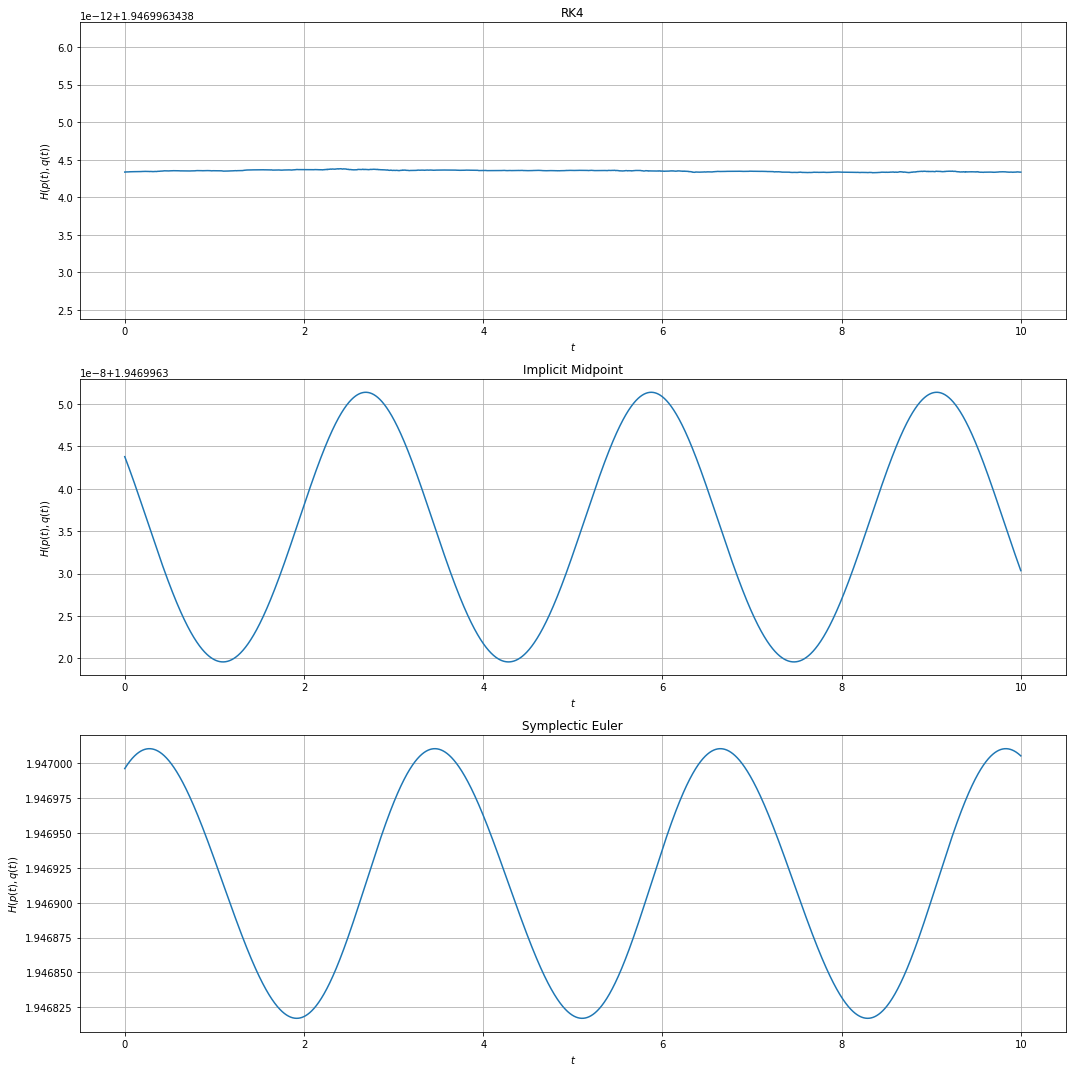

# ---------------------------------------------------------------- # 

l = 150


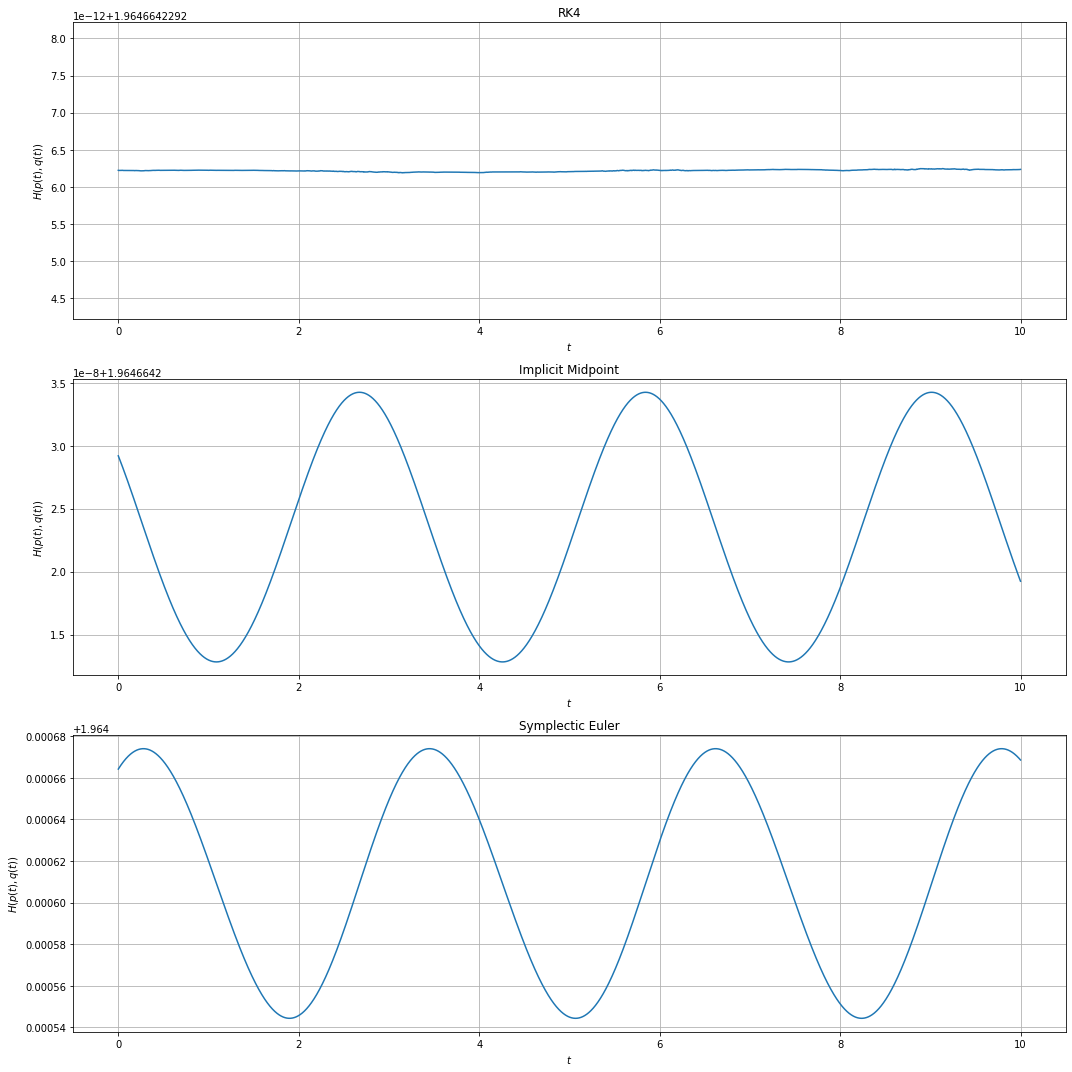

# ---------------------------------------------------------------- # 

l = 200


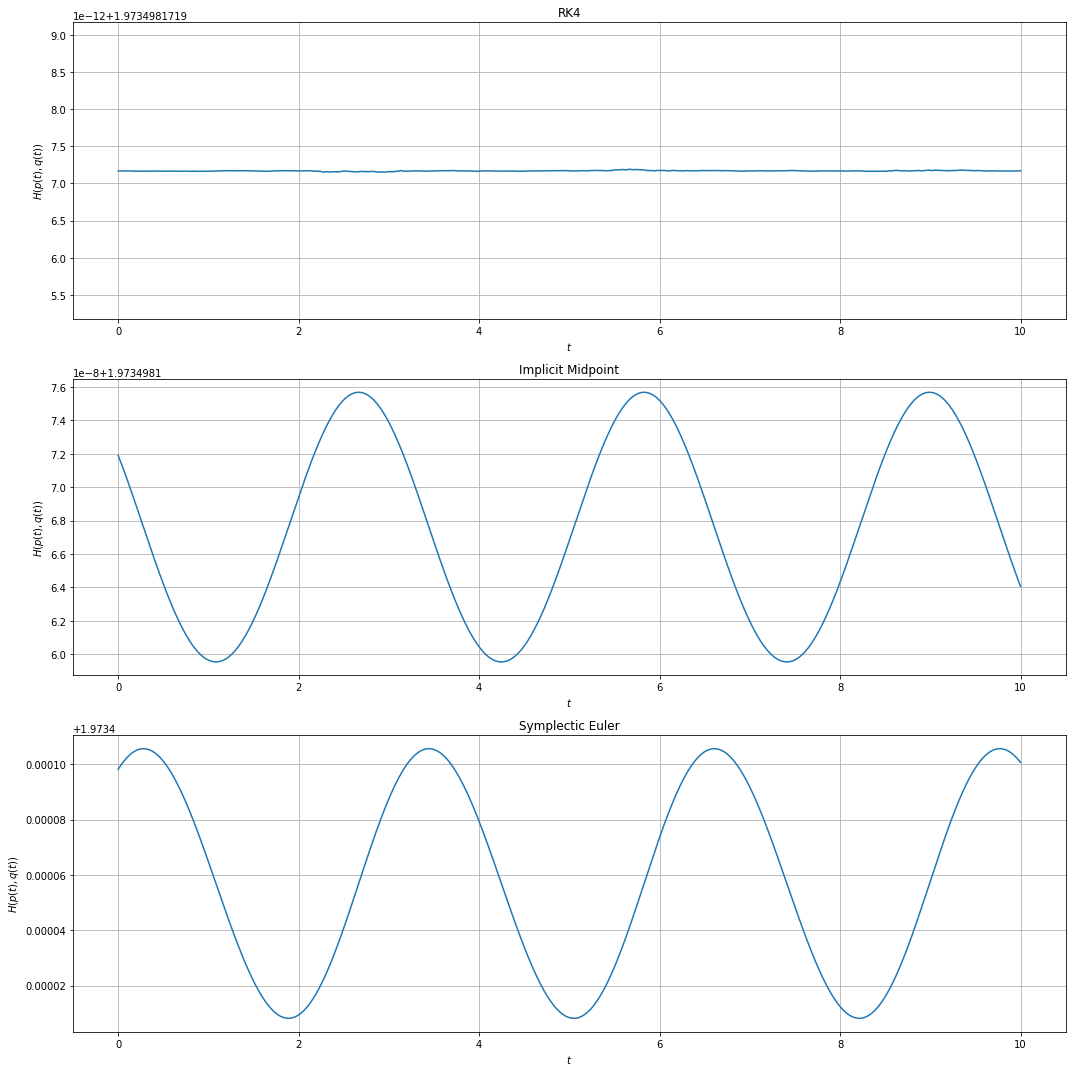

# ---------------------------------------------------------------- # 

l = 250


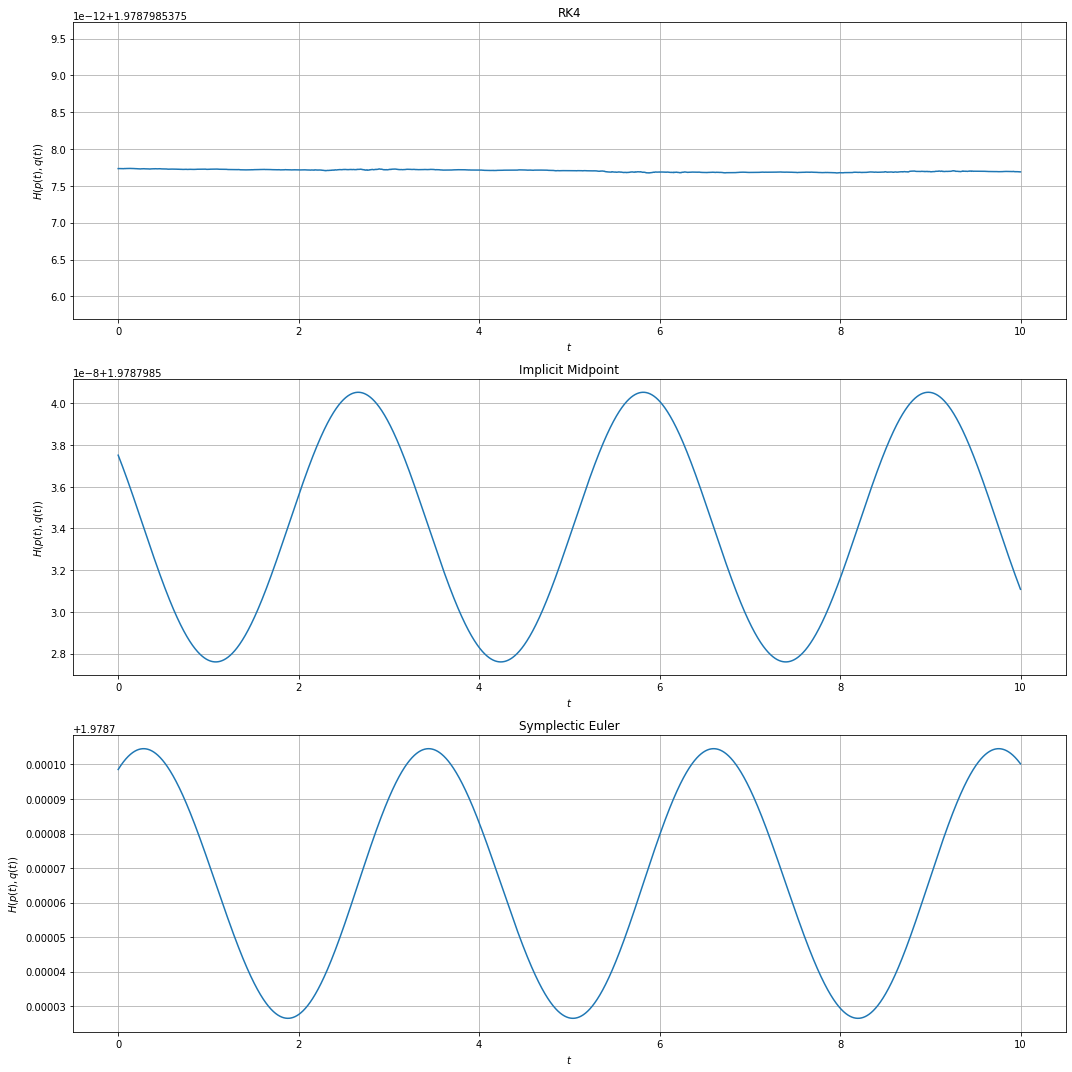

# ---------------------------------------------------------------- # 

l = 500


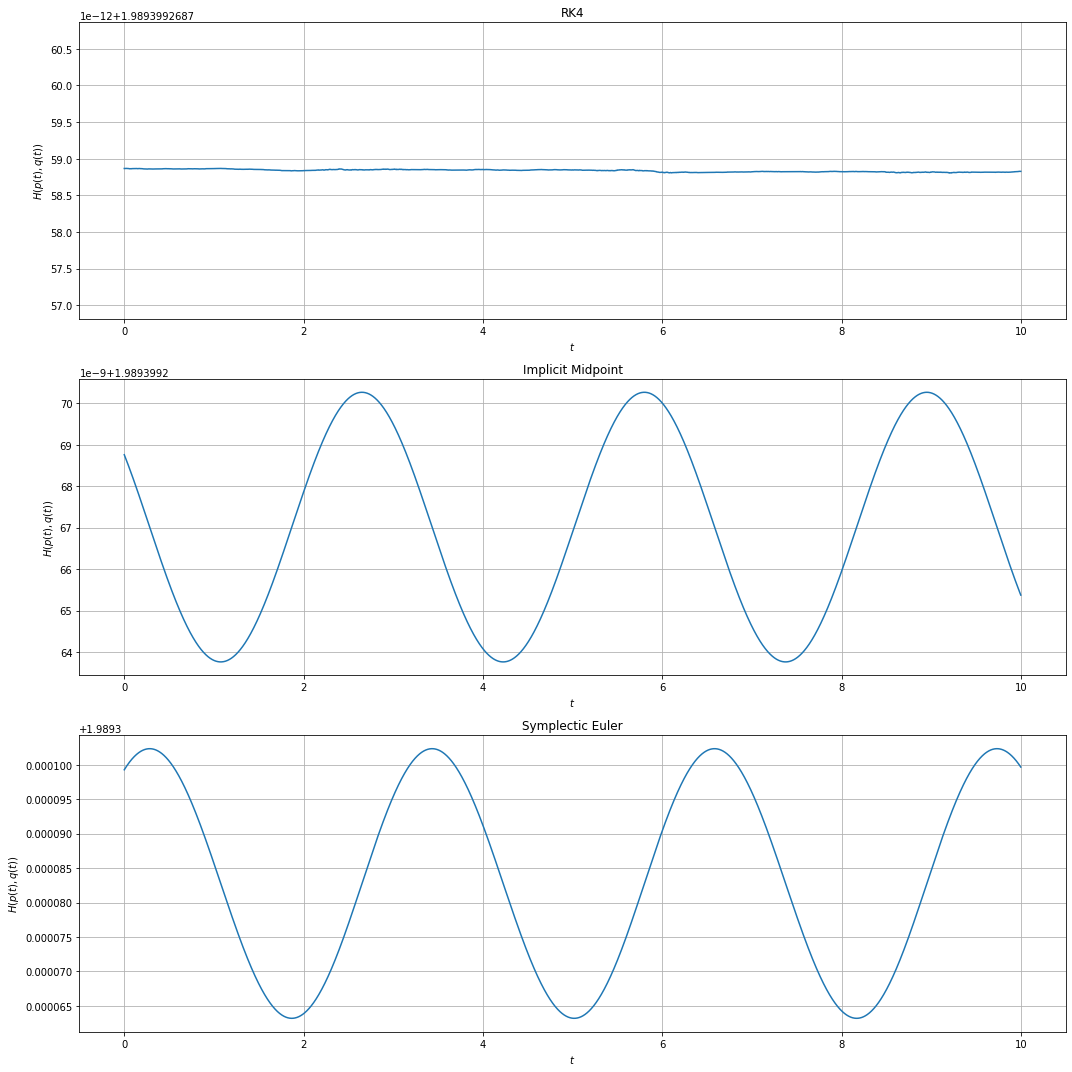

# ---------------------------------------------------------------- # 

l = 1000


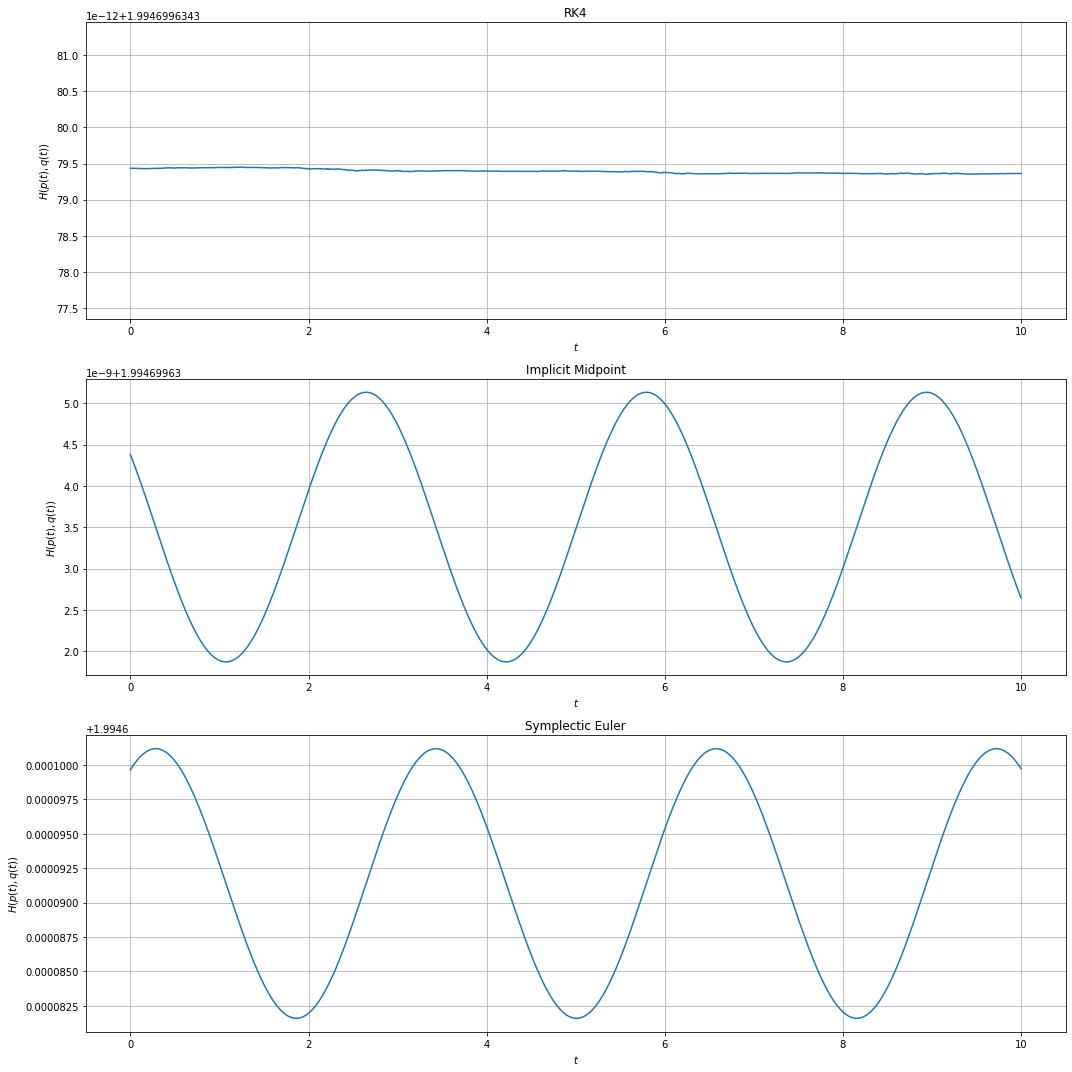

# ---------------------------------------------------------------- # 



In [5]:
l_array = [1, 2, 5, 10, 20, 25, 50, 100, 150, 200, 250, 500, 1000]
h_oscillatoins = []

print('#', '-'*64, '#', '\n')

for l in l_array:

    print('l =', l)
    h_oscillatoins += [test(l)]
    print('#', '-'*64, '#', '\n')

h_oscillatoins = np.array(h_oscillatoins).transpose()

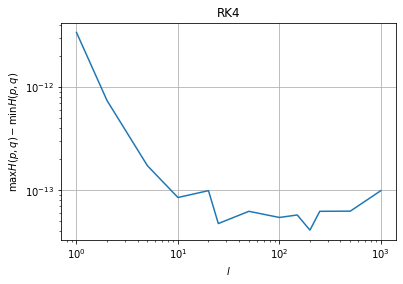

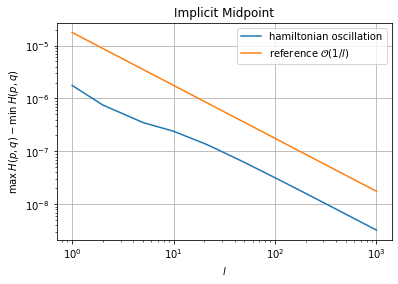

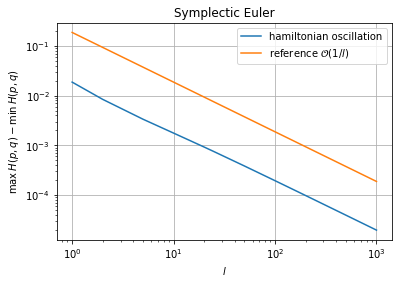

In [29]:
# print(h_oscillatoins)

l_array = np.array(l_array)

names = ['RK4', 'Implicit Midpoint', 'Symplectic Euler']

xlabel = '$l$'
ylabel = '$\max \:H(p, q) - \min \: H(p, q)$'

# -------------------------------- #

plt.loglog(l_array, h_oscillatoins[0])

plt.title(names[0])
plt.xlabel('$l$')
plt.ylabel('$\max H(p, q) - \min H(p, q)$')

plt.grid(True)
plt.show()

# -------------------------------- #

plt.loglog(l_array, h_oscillatoins[1],                     label = 'hamiltonian oscillation')
plt.loglog(l_array, 1/l_array * h_oscillatoins[1][0] * 10, label = 'reference $\mathcal{O}(1/l)$')

plt.title(names[1])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()

plt.grid(True)
plt.show()

# -------------------------------- #

plt.loglog(l_array, h_oscillatoins[2],                     label = 'hamiltonian oscillation')
plt.loglog(l_array, 1/l_array * h_oscillatoins[2][0] * 10, label = 'reference $\mathcal{O}(1/l)$')

plt.title(names[2])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()

plt.grid(True)
plt.show()